# Content and Objective

+ Show design of a filter using IFFT

In [1]:
# importing
import numpy as np
from scipy import signal
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 30}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(30, 8) )

### parameters

In [3]:
# sampling time
t_s = 1.
f_s = 1. / t_s

N_fft = 2048
f = np.arange( -f_s/2, f_s/2, f_s/N_fft)    

### define frequency response and get impulse response

In [4]:
# define ideal lowpass in the frequency regime
# end of passband and filter length

# ideal lowpass
f_g = f_s/3
K_1 = 51
H_w = np.zeros( N_fft )
H_w[ np.where( np.abs(f)<f_g) ] = 1


# triang. filter
f_g = f_s / 7
N_samples_tri = int( f_g / f_s * N_fft )
H_w = np.zeros(N_fft)
H_w[ 0 : N_samples_tri ] = 1 - np.arange( 0, N_samples_tri, 1 ) /N_samples_tri
H_w[ - N_samples_tri : ] = 1 - np.arange( N_samples_tri, 0, -1 ) /N_samples_tri

In [5]:
# find impulse response by IFFT and restricting to K values
h_1_part = np.fft.ifft( H_w*np.exp(-1j*2*np.pi*f*(K_1-1)/2), N_fft)[:(K_1+1)//2]
h_1 = np.append( h_1_part, (h_1_part[::-1])[1:])

### get (more accurate) frequency response

In [6]:
freq, H_1 = signal.freqz(h_1, worN=f*2*np.pi, whole=True) 

H_w = np.fft.fftshift( H_w )

### plotting

C:\Users\jaekel\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, '$|H_{designed}(f)| \\; (dB)$')

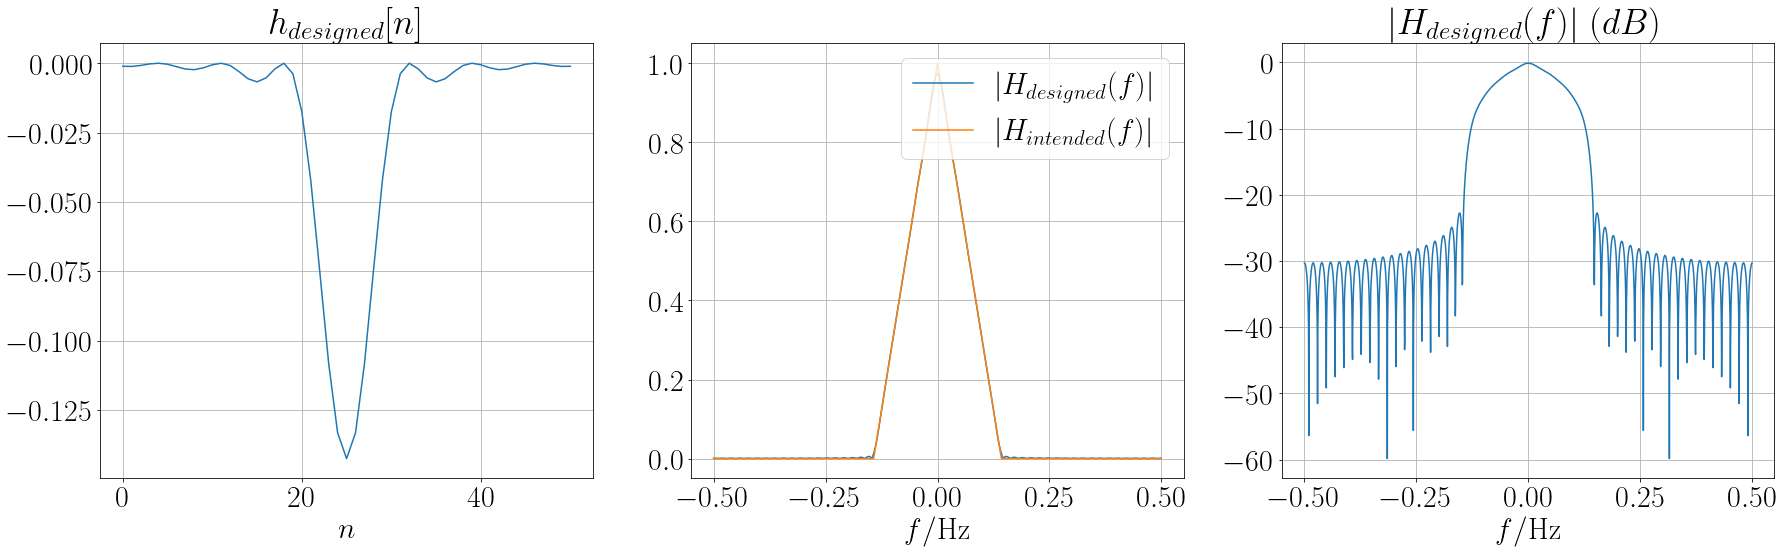

In [8]:
plt.subplot(131)
plt.plot( np.arange(len(h_1)), h_1)
plt.grid(True)
plt.xlabel('$n$')
plt.title('$h_{designed}[n]$')

plt.subplot(132)
plt.plot( f, np.abs(H_1), label='$|H_{designed}(f)|$')
plt.plot( f, np.abs(H_w), label='$|H_{intended}(f)|$')
plt.grid(True)   
plt.legend(loc='upper right')    
plt.xlabel('$f/\mathrm{Hz}$')

plt.subplot(133)
plt.plot( f, 10*np.log10(np.abs(H_1)))
plt.grid(True)   
plt.xlabel('$f/\mathrm{Hz}$')
plt.title('$|H_{designed}(f)| \\; (dB)$')       